# Question 1

In [17]:
import matplotlib.pyplot as plt
import numpy as np
%pip install scikit-image
from skimage import io


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


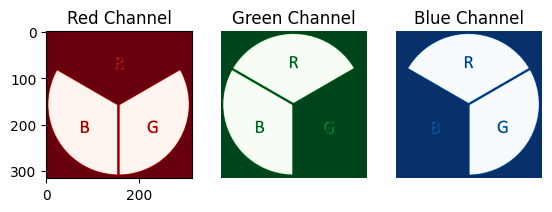

In [18]:
#1a
image_np_array = io.imread('colors.png')
#image_np_array

red_channel = image_np_array[:, :, 0] 
green_channel = image_np_array[:, :, 1]
blue_channel = image_np_array[:, :, 2]

fig, axs = plt.subplots(1, 3)

# printing individual color channel
axs[0].imshow(red_channel, cmap='Reds')
axs[0].set_title('Red Channel')
axs[0].axis('on')

axs[1].imshow(green_channel, cmap='Greens')
axs[1].set_title('Green Channel')
axs[1].axis('off')

axs[2].imshow(blue_channel, cmap='Blues')
axs[2].set_title('Blue Channel')
axs[2].axis('off')

plt.show()



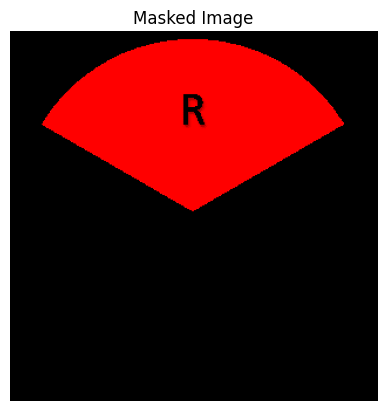

In [19]:
# 1b
red_condition = (red_channel >= 100) & (red_channel <= 255)
green_condition = (green_channel >= 0) & (green_channel <= 50)
blue_condition = (blue_channel >= 0) & (blue_channel <= 50)

#create the binary mask 
mask = red_condition & green_condition & blue_condition

#apply the mask 
masked_image = np.zeros_like(image_np_array)
masked_image[mask] = image_np_array[mask]

plt.imshow(masked_image)
plt.title('Masked Image')
plt.axis('off')
plt.show()


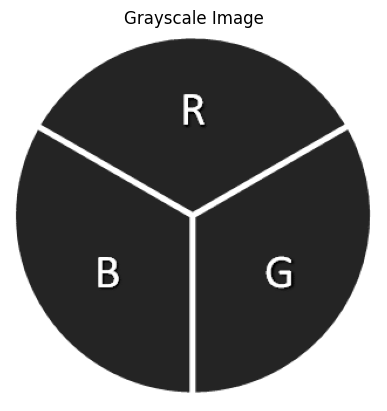

In [20]:
# 1c
grayscale_image = (red_channel.astype(np.float32) + 
                   green_channel.astype(np.float32) + 
                   blue_channel.astype(np.float32)) / 3

plt.imshow(grayscale_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

# Question 2

In [21]:
from skimage import io, color
import matplotlib.pyplot as plt
import numpy as np

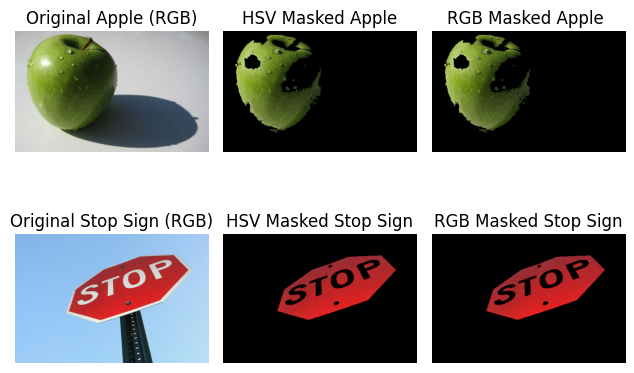

In [22]:
apple = io.imread('apple.jpg')
stop_sign = io.imread('stop-sign.jpg')

apple_copy = np.copy(apple)
stop_sign_copy = np.copy(stop_sign)

# RGB to HSV
apple_hsv = color.rgb2hsv(apple_copy)
stop_sign_hsv = color.rgb2hsv(stop_sign_copy)

# hsv color ranges for green and red colors 
green_lower = np.array([0.20, 0.4, 0.2])  
green_upper = np.array([0.45, 1.0, 1.0])

red_lower1 = np.array([0.0, 0.6, 0.4])
red_upper1 = np.array([0.05, 1.0, 1.0])
red_lower2 = np.array([0.95, 0.6, 0.4]) # for both startign and ending (red)
red_upper2 = np.array([1.0, 1.0, 1.0])

# for every pixel, checking if the pixel values fall under the defiend hsv values ranges 
apple_mask_hsv = ((apple_hsv[:, :, 0] >= green_lower[0]) & (apple_hsv[:, :, 0] <= green_upper[0]) &
                  (apple_hsv[:, :, 1] >= green_lower[1]) & (apple_hsv[:, :, 1] <= green_upper[1]) &
                  (apple_hsv[:, :, 2] >= green_lower[2]) & (apple_hsv[:, :, 2] <= green_upper[2]))

stop_sign_mask_hsv = (((stop_sign_hsv[:, :, 0] >= red_lower1[0]) & (stop_sign_hsv[:, :, 0] <= red_upper1[0])) |
                      ((stop_sign_hsv[:, :, 0] >= red_lower2[0]) & (stop_sign_hsv[:, :, 0] <= red_upper2[0]))) & \
                      (stop_sign_hsv[:, :, 1] >= red_lower1[1]) & (stop_sign_hsv[:, :, 1] <= red_upper1[1]) & \
                      (stop_sign_hsv[:, :, 2] >= red_lower1[2]) & (stop_sign_hsv[:, :, 2] <= red_upper1[2])

# mask RGB images
apple_masked_rgb = np.zeros_like(apple)
apple_masked_rgb[apple_mask_hsv] = apple[apple_mask_hsv]

stop_sign_masked_rgb = np.zeros_like(stop_sign)
stop_sign_masked_rgb[stop_sign_mask_hsv] = stop_sign[stop_sign_mask_hsv]

# mask HSV images 
apple_masked_hsv = np.zeros_like(apple_hsv)
apple_masked_hsv[apple_mask_hsv] = apple_hsv[apple_mask_hsv]
apple_masked_hsv_rgb = color.hsv2rgb(apple_masked_hsv) #convert into RGB for visualisation 

stop_sign_masked_hsv = np.zeros_like(stop_sign_hsv)
stop_sign_masked_hsv[stop_sign_mask_hsv] = stop_sign_hsv[stop_sign_mask_hsv]
stop_sign_masked_hsv_rgb = color.hsv2rgb(stop_sign_masked_hsv)

fig, axes = plt.subplots(2, 3)

# apple
axes[0, 0].imshow(apple)
axes[0, 0].set_title('Original Apple (RGB)')
axes[0, 0].axis('off')

axes[0, 1].imshow(apple_masked_hsv_rgb)
axes[0, 1].set_title('HSV Masked Apple')
axes[0, 1].axis('off')

axes[0, 2].imshow(apple_masked_rgb)
axes[0, 2].set_title('RGB Masked Apple ')
axes[0, 2].axis('off')

# stop sign
axes[1, 0].imshow(stop_sign)
axes[1, 0].set_title('Original Stop Sign (RGB)')
axes[1, 0].axis('off')

axes[1, 1].imshow(stop_sign_masked_hsv_rgb)
axes[1, 1].set_title('HSV Masked Stop Sign')
axes[1, 1].axis('off')

axes[1, 2].imshow(stop_sign_masked_rgb)
axes[1, 2].set_title('RGB Masked Stop Sign')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()


# Question 3

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, img_as_ubyte

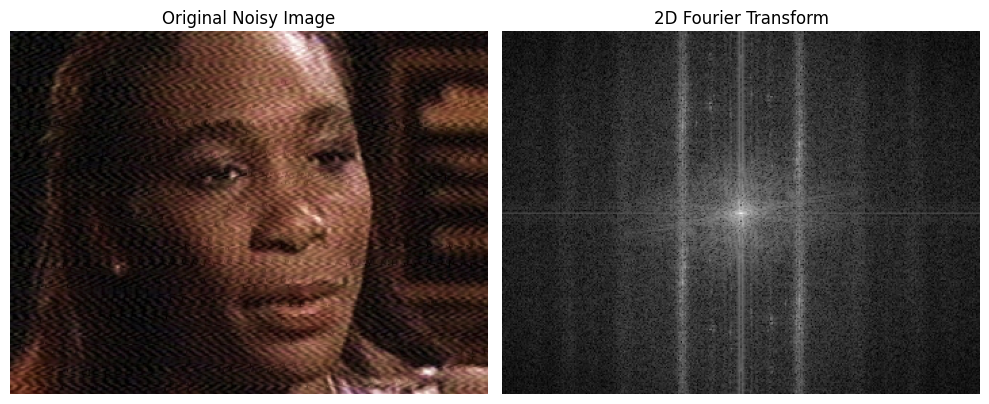

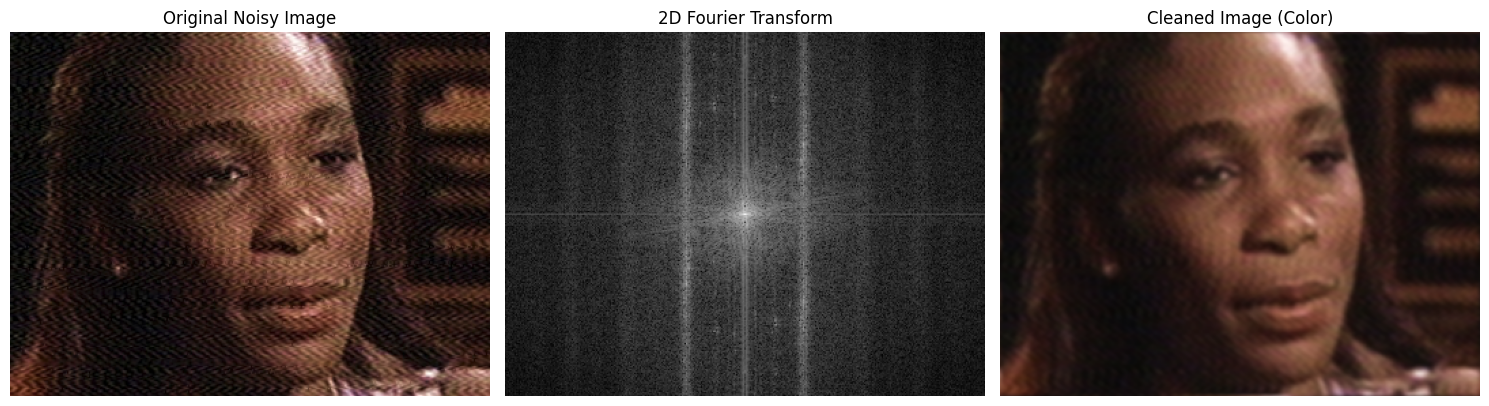

In [5]:
image_path = 'bandnoise.png'
color_image = io.imread(image_path)

# covert to rgb
if color_image.shape[2] == 4:
    color_image = color.rgba2rgb(color_image)

# convert to grayscale
grey_image = color.rgb2gray(color_image)

# 2D Discrete Fourier Transform
fft = np.fft.fft2(grey_image)
fft_shifted = np.fft.fftshift(fft)
magnitude_spectrum = np.log(np.abs(fft_shifted) + 1)

fig1, axes1 = plt.subplots(1, 2, figsize=(10, 5))

axes1[0].imshow(color_image)
axes1[0].set_title('Original Noisy Image')
axes1[0].axis('off')

#code to display the greyscale original image
"""axes1[1].imshow(grey_image, cmap='gray') 
axes1[1].set_title('Optional - Original Noisy Image (Grey)')
axes1[1].axis('off')"""

axes1[1].imshow(magnitude_spectrum, cmap='gray')
axes1[1].set_title('2D Fourier Transform')
axes1[1].axis('off')

plt.tight_layout()
plt.show()

# Step 2: Design and Apply Gaussian Low-Pass Filter
rows, cols = grey_image.shape
crow, ccol = rows // 2, cols // 2

# Gaussian Filter Parameters
sigma = 30  # Adjust for desired blurring
x = np.linspace(-ccol, ccol, cols)
y = np.linspace(-crow, crow, rows)
X, Y = np.meshgrid(x, y)
gaussian_mask = np.exp(-((X**2 + Y**2) / (2 * sigma**2)))

# Apply the filter to each channel
processed_channels = []
for i in range(3):
    channel = color_image[:, :, i]
    fft_channel = np.fft.fft2(channel)
    fft_shifted_channel = np.fft.fftshift(fft_channel)
    fft_filtered_channel = fft_shifted_channel * gaussian_mask
    ifft_shifted_channel = np.fft.ifftshift(fft_filtered_channel)
    ifft_channel = np.fft.ifft2(ifft_shifted_channel)
    processed_channel = np.clip(np.abs(ifft_channel), 0, 255)  # Ensure pixel values are in range
    processed_channels.append(processed_channel)

# Combine processed channels and convert to uint8
cleaned_color_image = np.stack(processed_channels, axis=-1)
cleaned_color_image = img_as_ubyte(cleaned_color_image / cleaned_color_image.max())

# Step 3: Display All Three Images
fig2, axes2 = plt.subplots(1, 3, figsize=(15, 5))

axes2[0].imshow(color_image, cmap='gray')
axes2[0].set_title('Original Noisy Image')
axes2[0].axis('off')

axes2[1].imshow(magnitude_spectrum, cmap='gray')
axes2[1].set_title('2D Fourier Transform')
axes2[1].axis('off')

axes2[2].imshow(cleaned_color_image)
axes2[2].set_title('Cleaned Image (Color)')
axes2[2].axis('off')

plt.tight_layout()
plt.show()


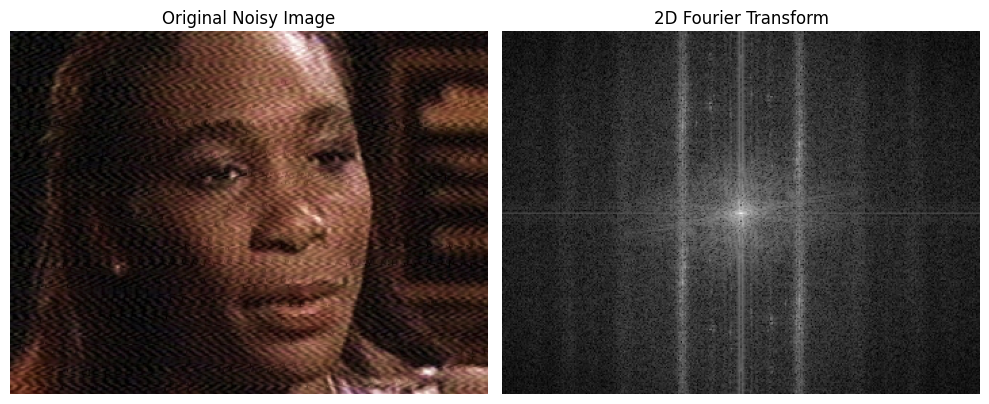

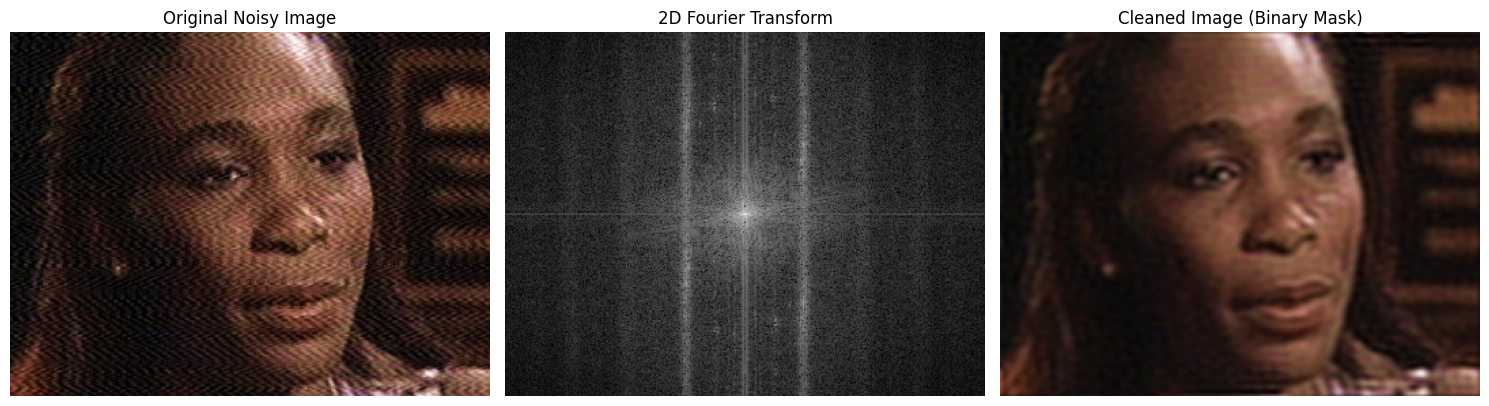

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, img_as_ubyte

# Step 1: Load the Image
image_path = 'bandnoise.png'
color_image = io.imread(image_path)

# Convert to RGB if it has an alpha channel
if color_image.shape[2] == 4:
    color_image = color.rgba2rgb(color_image)

# Convert to Grayscale
grey_image = color.rgb2gray(color_image)

# 2D Discrete Fourier Transform
fft = np.fft.fft2(grey_image)
fft_shifted = np.fft.fftshift(fft)
magnitude_spectrum = np.log(np.abs(fft_shifted) + 1)

# Display the Original Image and Its Fourier Transform
fig1, axes1 = plt.subplots(1, 2, figsize=(10, 5))

axes1[0].imshow(color_image)
axes1[0].set_title('Original Noisy Image')
axes1[0].axis('off')

axes1[1].imshow(magnitude_spectrum, cmap='gray')
axes1[1].set_title('2D Fourier Transform')
axes1[1].axis('off')

plt.tight_layout()
plt.show()

# Step 2: Design and Apply Binary Low-Pass Filter
rows, cols = grey_image.shape
crow, ccol = rows // 2, cols // 2

# Binary Mask Parameters
radius = 40  # Cutoff frequency (adjust as needed)
x = np.linspace(-ccol, ccol, cols)
y = np.linspace(-crow, crow, rows)
X, Y = np.meshgrid(x, y)

# Create Binary Mask
binary_mask = np.zeros_like(grey_image)
binary_mask[np.sqrt(X**2 + Y**2) <= radius] = 1

# Apply the Binary Mask to Each Channel
processed_channels = []
for i in range(3):
    channel = color_image[:, :, i]
    fft_channel = np.fft.fft2(channel)
    fft_shifted_channel = np.fft.fftshift(fft_channel)
    fft_filtered_channel = fft_shifted_channel * binary_mask  # Apply Binary Mask
    ifft_shifted_channel = np.fft.ifftshift(fft_filtered_channel)
    ifft_channel = np.fft.ifft2(ifft_shifted_channel)
    processed_channel = np.clip(np.abs(ifft_channel), 0, 255)  # Ensure pixel values are in range
    processed_channels.append(processed_channel)

# Combine Processed Channels and Convert to uint8
cleaned_color_image = np.stack(processed_channels, axis=-1)
cleaned_color_image = img_as_ubyte(cleaned_color_image / cleaned_color_image.max())

# Step 3: Display All Three Images
fig2, axes2 = plt.subplots(1, 3, figsize=(15, 5))

axes2[0].imshow(color_image)
axes2[0].set_title('Original Noisy Image')
axes2[0].axis('off')

axes2[1].imshow(magnitude_spectrum, cmap='gray')
axes2[1].set_title('2D Fourier Transform')
axes2[1].axis('off')

axes2[2].imshow(cleaned_color_image)
axes2[2].set_title('Cleaned Image (Binary Mask)')
axes2[2].axis('off')

plt.tight_layout()
plt.show()


# Question 4

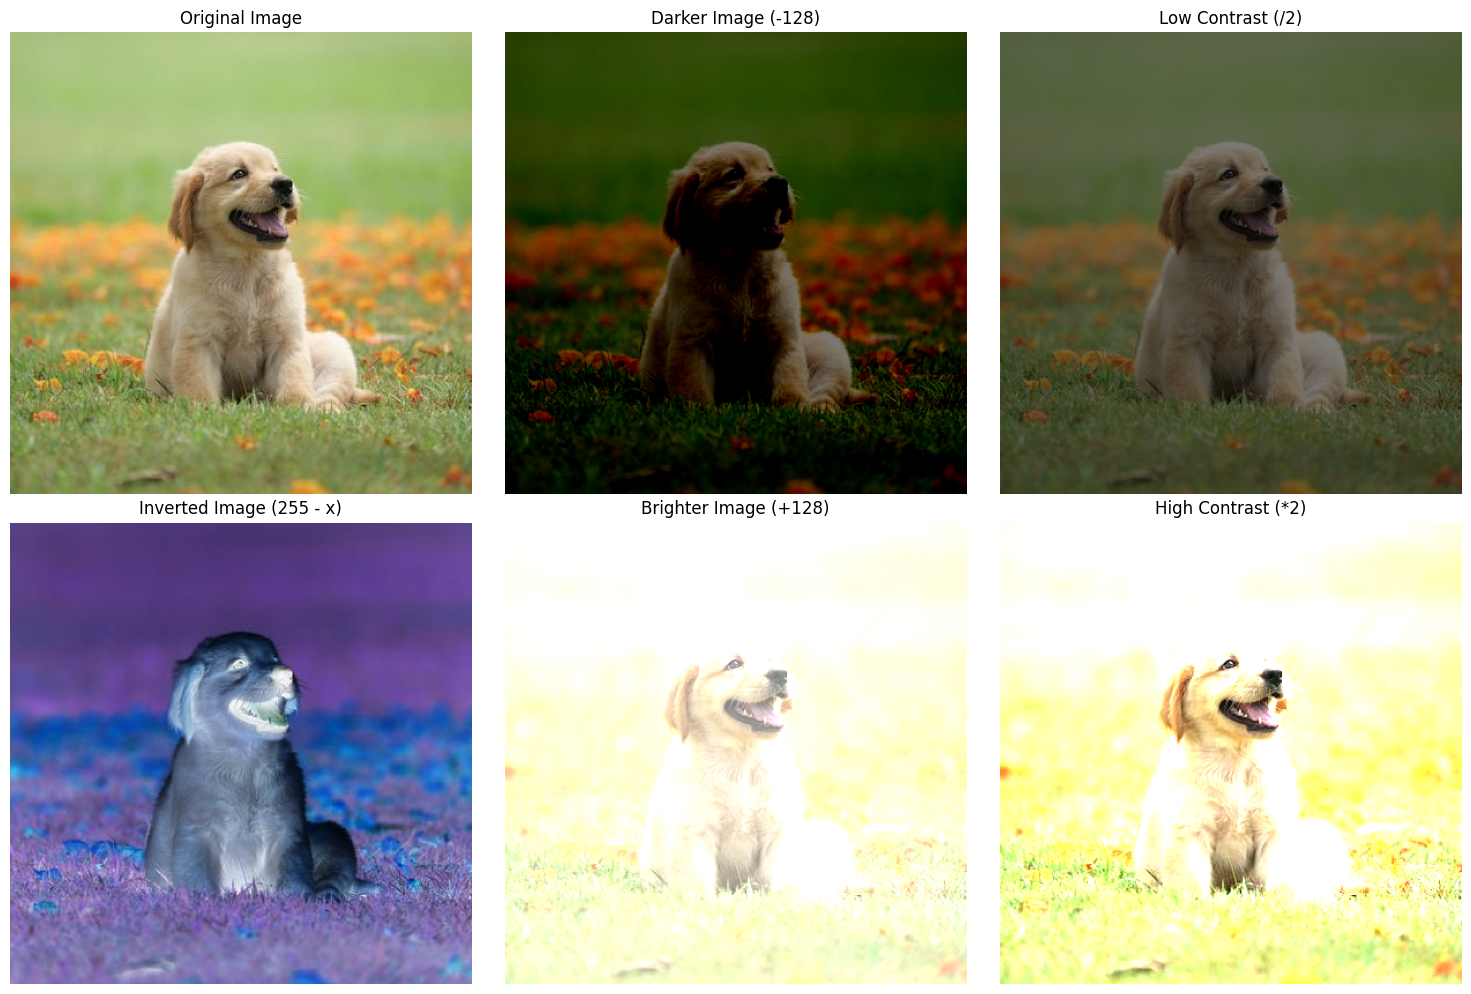

In [2]:
from skimage import io
from skimage.util import img_as_float
import matplotlib.pyplot as plt
import numpy as np

image_path = 'dog.jpg'
original_image = io.imread(image_path)
image_float = img_as_float(original_image) # normalised to range b/w 0-1

""" darker_image = np.clip(original_image - 128, 0, 255).astype(np.uint8)
low_contrast_image = (original_image / 2).astype(np.uint8)
inverted_image = 255 - original_image
brighter_image = np.clip(original_image + 128, 0, 255).astype(np.uint8)
high_contrast_image = np.clip(original_image * 2, 0, 255).astype(np.uint8)"""

darker_image = np.clip(image_float - 0.5, 0, 1)
low_contrast_image = np.clip(image_float / 2, 0, 1)
inverted_image = 1 - image_float
brighter_image = np.clip(image_float + 0.5, 0, 1)  
high_contrast_image = np.clip(image_float * 2, 0, 1)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

titles = ['Original Image', 'Darker Image (-128)', 'Low Contrast (/2)',
          'Inverted Image (255 - x)', 'Brighter Image (+128)', 'High Contrast (*2)']
images = [original_image, darker_image, low_contrast_image, inverted_image, brighter_image, high_contrast_image]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()


# Question 5


In [1]:
!sudo apt-get update
!sudo apt-get install -y libgl1-mesa-glx

Get:1 https://packages.microsoft.com/repos/microsoft-ubuntu-focal-prod focal InRelease [3632 B]
Hit:3 https://dl.yarnpkg.com/debian stable InRelease                           
Get:4 https://packages.microsoft.com/repos/microsoft-ubuntu-focal-prod focal/main amd64 Packages [332 kB]
Hit:5 https://repo.anaconda.com/pkgs/misc/debrepo/conda stable InRelease       
Get:6 http://security.ubuntu.com/ubuntu focal-security InRelease [128 kB]      
Hit:7 http://archive.ubuntu.com/ubuntu focal InRelease                         
Get:8 http://archive.ubuntu.com/ubuntu focal-updates InRelease [128 kB]        
Hit:2 https://packagecloud.io/github/git-lfs/ubuntu focal InRelease            
Get:9 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [4329 kB]
Get:10 http://archive.ubuntu.com/ubuntu focal-backports InRelease [128 kB]
Get:11 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [4219 kB]
Fetched 9267 kB in 2s (6064 kB/s)                                 

In [2]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
%pip install opencv-python
import cv2


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
# image in grayscale - cv2 reads only 2D
image = io.imread('cameraman.jpeg', as_gray=True)

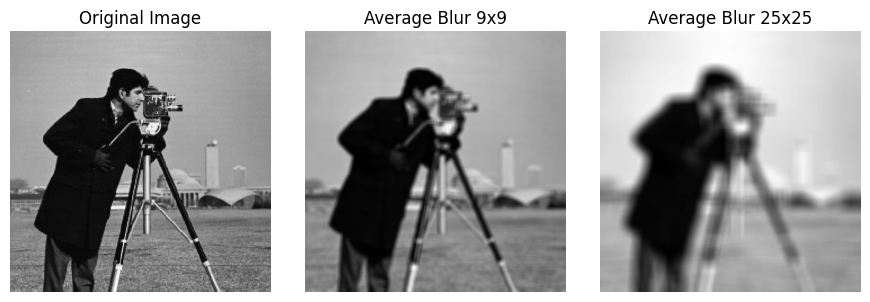

In [ ]:
# 5 a 
# build the kernel 
def average_blur(img, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size) #ranges between 0-1
    return cv2.filter2D(img, -1, kernel) # blur

blur_9x9 = average_blur(image, 9)
blur_25x25 = average_blur(image, 25)

plt.figure(figsize=(9, 3))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Average Blur 9x9')
plt.imshow(blur_9x9, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Average Blur 25x25')
plt.imshow(blur_25x25, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

In [30]:
# converts into rgb so that the images are not printed with the green-ish tint
def convert_bgr_to_rgb(img): 
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

image_rgb = convert_bgr_to_rgb(image)

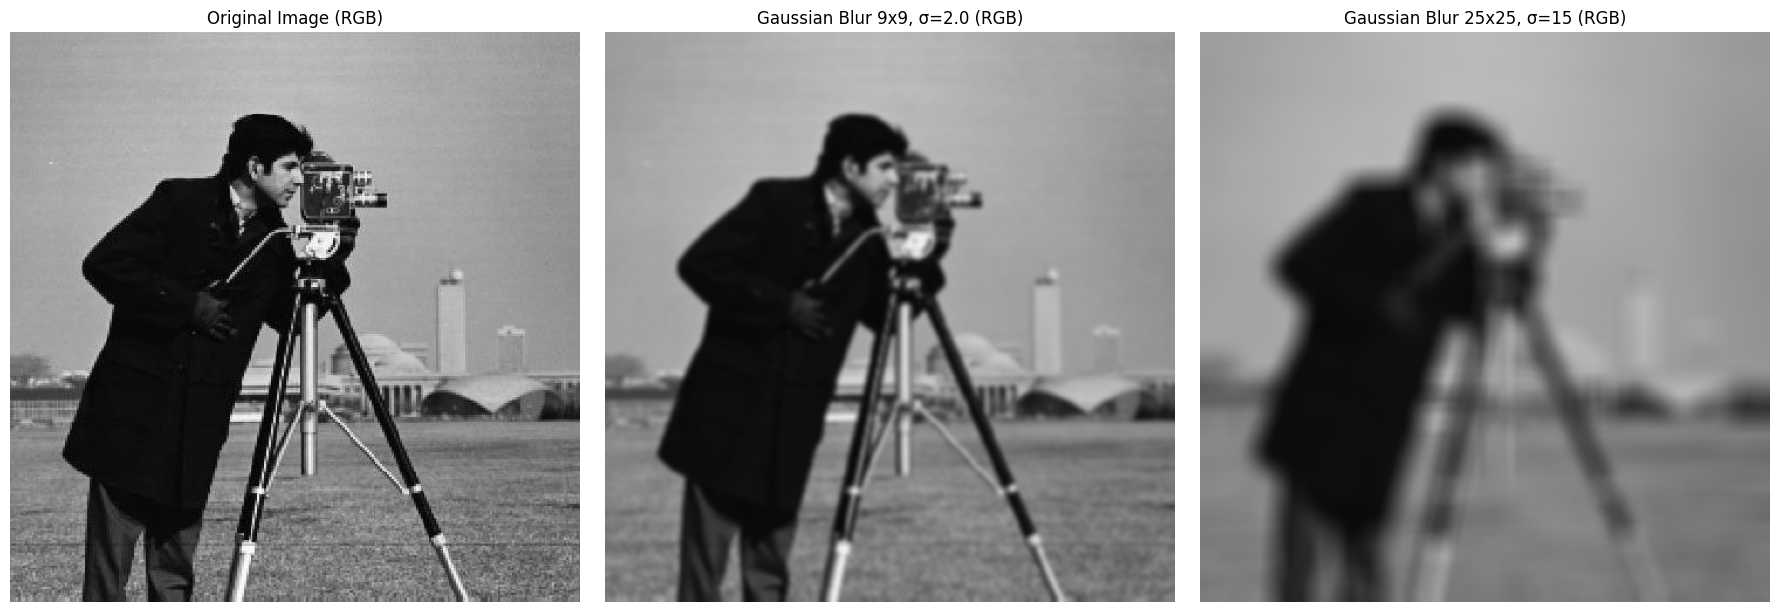

In [ ]:
# 5 b
# gaussian blur
gaussian_blur_9x9 = cv2.GaussianBlur(image, (9, 9), 2.0)
gaussian_blur_25x25 = cv2.GaussianBlur(image, (25, 25), 15)

gaussian_blur_9x9_rgb = convert_bgr_to_rgb(gaussian_blur_9x9)
gaussian_blur_25x25_rgb = convert_bgr_to_rgb(gaussian_blur_25x25)

plt.figure(figsize=(18, 6))

"""plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Gaussian Blur 9x9, σ=2.0')
plt.imshow(gaussian_blur_9x9)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Gaussian Blur 25x25, σ=15')
plt.imshow(gaussian_blur_25x25)
plt.axis('off')"""

plt.subplot(1, 3, 1)
plt.title('Original Image (RGB)')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Gaussian Blur 9x9, σ=2.0 (RGB)')
plt.imshow(gaussian_blur_9x9_rgb)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Gaussian Blur 25x25, σ=15 (RGB)')
plt.imshow(gaussian_blur_25x25_rgb)
plt.axis('off')


plt.tight_layout()
plt.show()


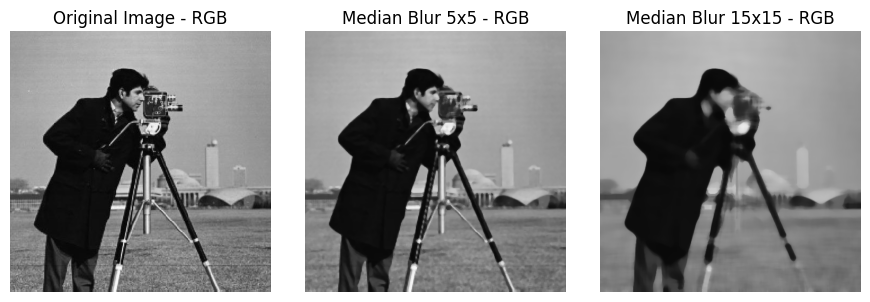

In [ ]:
# 5 c
# median blur
median_blur_5x5 = cv2.medianBlur(image, 5)
median_blur_15x15 = cv2.medianBlur(image, 15)

median_blur_5x5_rgb = convert_bgr_to_rgb(median_blur_5x5)
median_blur_15x15_rgb = convert_bgr_to_rgb(median_blur_15x15)

plt.figure(figsize=(9, 3))

plt.subplot(1, 3, 1)
plt.title('Original Image - RGB')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Median Blur 5x5 - RGB')
plt.imshow(median_blur_5x5_rgb)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Median Blur 15x15 - RGB')
plt.imshow(median_blur_15x15_rgb)
plt.axis('off')

plt.tight_layout()
plt.show()


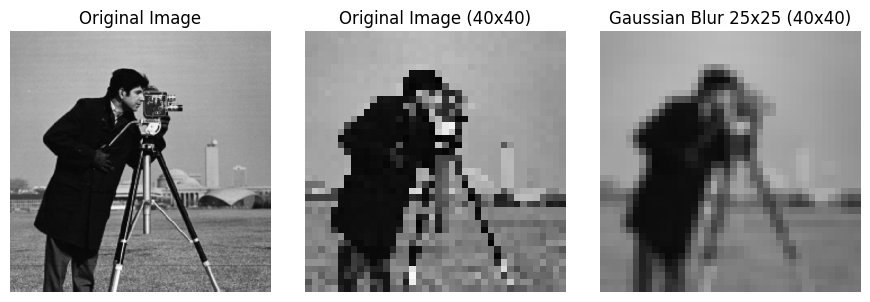

In [35]:
# 5 d 
resized_original = cv2.resize(image, (40, 40))
resized_gaussian_25x25 = cv2.resize(gaussian_blur_25x25, (40, 40))

resized_original_rgb = convert_bgr_to_rgb(resized_original)
resized_gaussian_25x25_rgb = convert_bgr_to_rgb(resized_gaussian_25x25)

plt.figure(figsize=(9, 3))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Original Image (40x40)')
plt.imshow(resized_original_rgb)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Gaussian Blur 25x25 (40x40)')
plt.imshow(resized_gaussian_25x25_rgb)
plt.axis('off')

plt.tight_layout()
plt.show()
